<a href="https://colab.research.google.com/github/tanmayRemble/epamdemo/blob/main/Food_Delivery_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
from geopy.distance import geodesic

In [37]:
# Importing Dataset

master_df = pd.read_csv('/food_delivery_dataset.csv')
master_df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


**Understanding and describing data**

In [38]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

We have 19 columns and 45,593 rows in the original dataset.
Describing columns that are not obviously named:
ID: Order ID.

Vehicle_condition: 0 means very good, 3 means very bad.

Type_of_order: Snack, Drinks, Buffet or Meal.

multiple_deliveries: How many deliveries have to be made in one trip.

In [39]:
# Checking for null values in the unmodified dataset

master_df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

We see that all rows and columns are filled in the unmodified dataset.
But there might still exist null values in wrong formats.

**Data Pre-Processing**

Data Cleaning

In [40]:
# Finding all types of null values, storing in set null_types

master_df = master_df.astype(str) # converting dataframe to string

null_types = set()

for column in master_df.columns:
  unique_vals = master_df[column].unique()
  for val in unique_vals:
    if 'nan' in val.lower():
      null_types.add(val)

print(null_types)

{'conditions NaN', 'NaN '}


In [41]:
# Correcting null values to np.nan

for na_value in null_types:
  master_df.replace(na_value, np.nan, inplace = True)

In [42]:
# Counting null values again

master_df.isna().sum()


ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [43]:
# removing whitespaces from either sides

master_df = master_df.apply(lambda x: x.str.strip())
master_df.drop(columns= master_df.columns[0], inplace = True)
   

In [44]:
# Dropping rows containing null values

master_df.dropna(inplace = True)

** Data Wrangling**

In [45]:
master_df['Weatherconditions'] = master_df['Weatherconditions'].str.split(" ", expand=True)[1]

master_df['Time_taken(min)'] = master_df['Time_taken(min)'].str.split(" ", expand=True)[1]

In [46]:
# Converting columns to correct data-type

num_cols = ['Delivery_person_Age','Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude',
            'Delivery_location_latitude','Delivery_location_longitude','Vehicle_condition',
            'multiple_deliveries','Time_taken(min)']

## Converting numerical columns to float
for col in num_cols:
    master_df[col] = master_df[col].astype('float64')
    
## Converting Order_Date column to datetime date format
master_df['Order_Date'] = pd.to_datetime(master_df['Order_Date'], format = "%d-%m-%Y")

In [47]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
lab = le.fit_transform(master_df['Delivery_person_ID'])

In [48]:
# one hot encoding
encoded_df = master_df.copy()

encoded_df = pd.get_dummies(encoded_df ,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                                  'Type_of_vehicle', 'City'])
encoded_df = pd.get_dummies(encoded_df ,columns = ['Festival'], drop_first=True)

**Adding useful features**

In [49]:
# Computing distance from restaurant to delivery location using lat and long and making a new column named 'distance_km'

# creating new column filled with zeroes
master_df['distance_km'] = np.zeros(master_df.shape[0])

restaurant_cordinates = master_df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
delivery_location_cordinates = master_df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()

# calculating and filling in distance
for i in range(master_df.shape[0]):
    master_df['distance_km'].loc[i] = geodesic(restaurant_cordinates[i], delivery_location_cordinates[i]).km

# Dropping lat long columns
master_df = master_df.drop(columns = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'] )
     

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-bcb5ba26c8fe>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-bcb5ba26c8fe>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-bcb5ba26c8fe>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<i

In [50]:
# Cleaning column 'distance_km'

# Converting to string to remove ' km'
master_df['distance_km'] = master_df['distance_km'].astype(str).str[:-3].replace('',0)

# Converting to float and rounding off
master_df['distance_km'] = master_df['distance_km'].astype(float).round(2)

In [51]:
# We check for anomalous distance values

threshold_dist = 25
print(f"Number of deliveries with distance more than {threshold_dist} km =",
      master_df[master_df['distance_km'] > 25]['distance_km'].count())

print(f"Number of deliveries with distance 0 =",
      master_df[master_df['distance_km'] == 0]['distance_km'].count())

Number of deliveries with distance more than 25 km = 131
Number of deliveries with distance 0 = 3835


In [52]:
# Dropping entries with distance equal to 0 or more than 25

# index of rows that have distance equal to 0 or greater than 25 km
index_to_drop = master_df[(master_df['distance_km'] == 0) | (master_df['distance_km'] > 25)].index

master_df.drop(index_to_drop, inplace = True)

In [53]:
# Adding column for avg_speed

master_df['avg_speed_kmph'] = round(master_df['distance_km']*60 / master_df['Time_taken(min)'])

**Exploratory Data Analysis**

In [54]:
# Doing EDA on a copy of the master dataframe

edal_df = master_df.copy()

<ipython-input-55-fcfd09beb99d>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



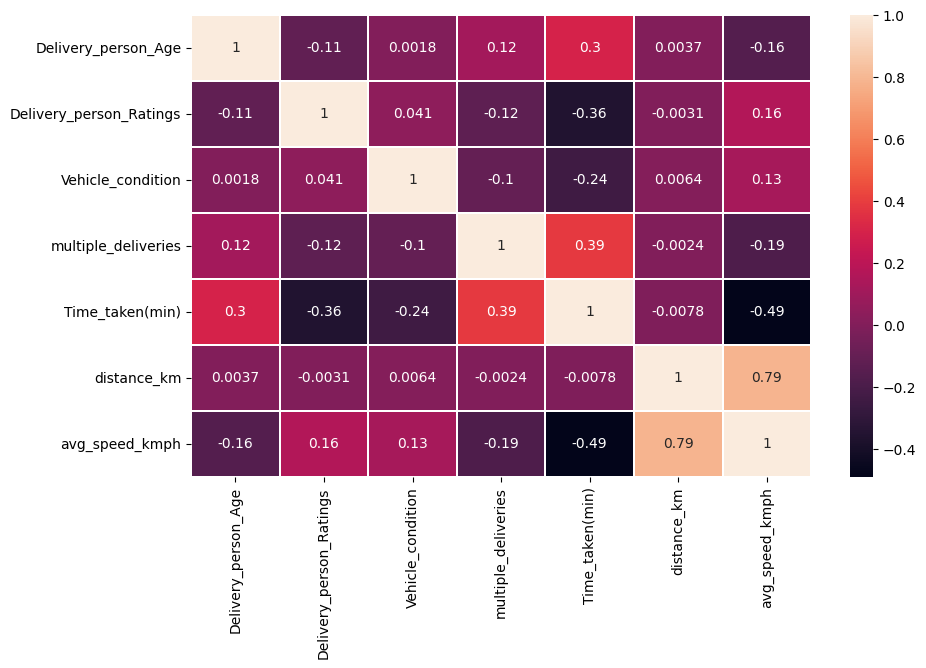

In [55]:
# Correlation HeatMap

plt.figure(figsize=(10,6))

sns.heatmap(edal_df.corr(), annot=True, linewidth=0.1)
plt.show()

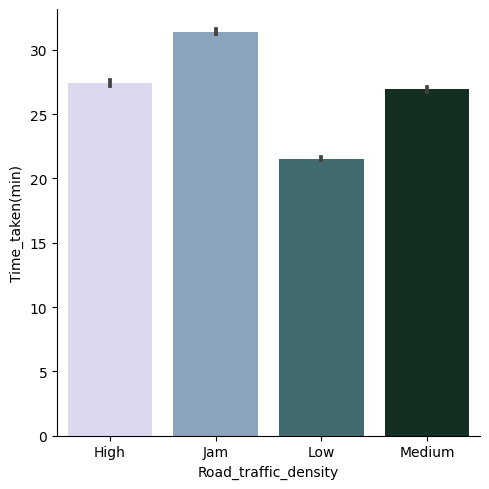

In [56]:
sns.catplot(x="Road_traffic_density", 
            y="Time_taken(min)",
            kind="bar",
            palette="ch:5", 
            data=edal_df)

In [57]:
# Age v/s Delivery Time (Weatherwise)

fig=px.line(edal_df.sort_values(by='Delivery_person_Age'),
            x='Delivery_person_Age',
            y='Time_taken(min)',
            animation_frame='Weatherconditions',
            animation_group='Delivery_person_Age',
            color='Weatherconditions',
            markers=True,
            template='plotly_dark',
            title='Driver Age vs Delivery Time (Weatherwise)')

fig.update_traces(showlegend=False)

In [58]:
# Difference between average speeds of under 30 and over 30 drivers

under_30 = edal_df[ edal_df['Delivery_person_Age'] < 30]['avg_speed_kmph'].mean()
above_30 = edal_df[ edal_df['Delivery_person_Age'] >= 30]['avg_speed_kmph'].mean()

print(f'Average speed of persons under 30: {round(under_30,2)} kmph')
print(f'Average speed of persons above 30: {round(above_30,2)} kmph')

Average speed of persons under 30: 28.79 kmph
Average speed of persons above 30: 21.7 kmph


**Insight 2: The average delivery speed of delivery persons under the age of 30 is about 25% more than of those above the age of 30**

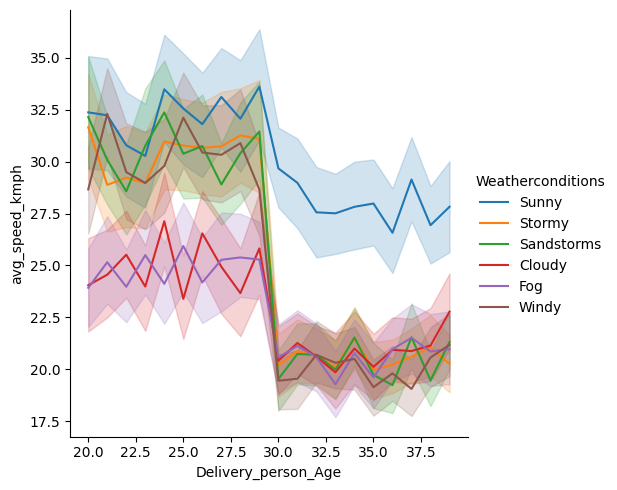

In [59]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Weatherconditions',kind = 'line')

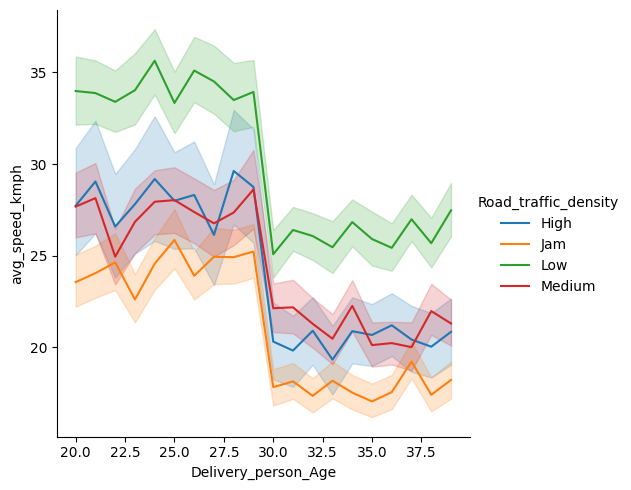

In [60]:
sns.relplot(data = edal_df, x = 'Delivery_person_Age', y = 'avg_speed_kmph',hue = 'Road_traffic_density',kind = 'line')

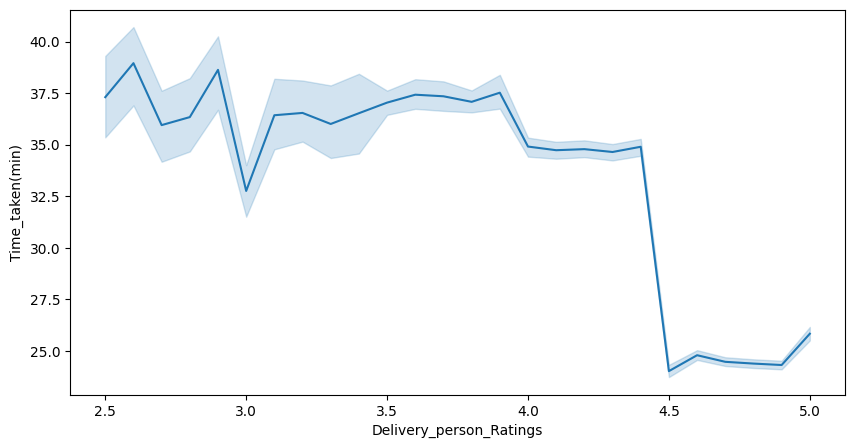

In [61]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="Time_taken(min)", data=edal_df)
plt.show()


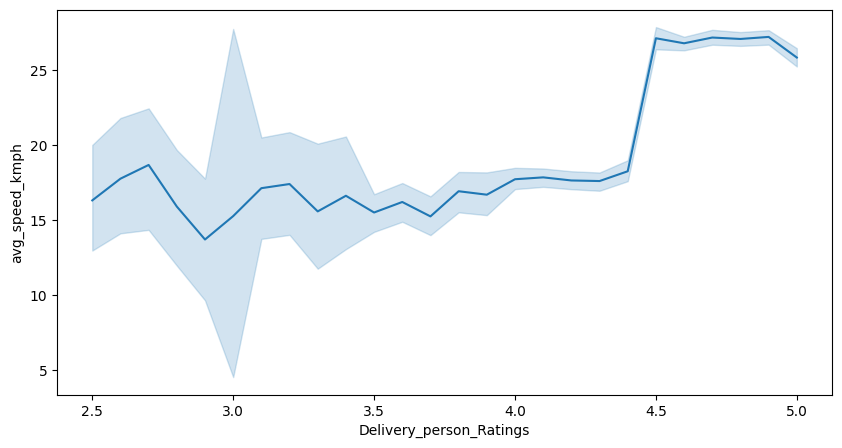

In [62]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.lineplot(x="Delivery_person_Ratings", y="avg_speed_kmph", data=edal_df)
plt.show()

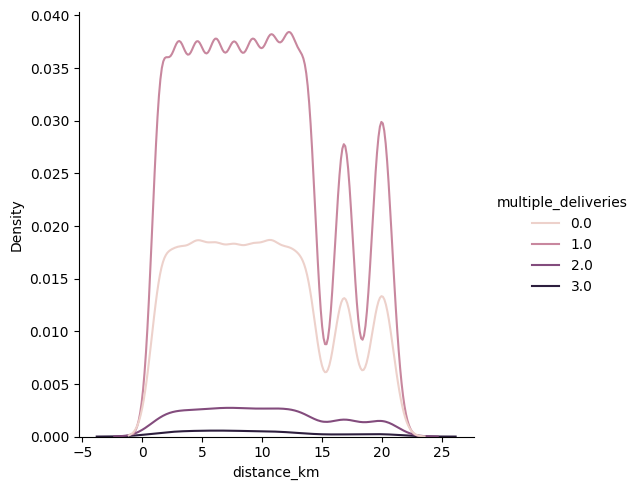

In [63]:
sns.displot(hue='multiple_deliveries',data=edal_df,kind='kde', x = 'distance_km')

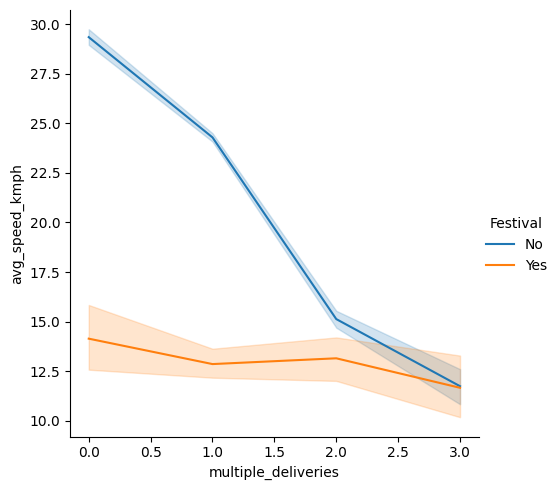

In [64]:
sns.relplot(data = edal_df, x = 'multiple_deliveries', y = 'avg_speed_kmph',hue='Festival',kind = 'line')

In [65]:
#  Sunny vs Storms vs Winds/Fog

edal_df[edal_df['Weatherconditions'] == 'Sunny']['avg_speed_kmph'].mean()

30.074092741935484

In [66]:
edal_storms = edal_df.loc[(edal_df['Weatherconditions'] == 'Stormy') | (edal_df['Weatherconditions'] == 'Sandstorms')]
print(edal_storms['Weatherconditions'].unique())
edal_storms['avg_speed_kmph'].mean()

['Stormy' 'Sandstorms']


25.351489497643957

In [67]:
edal_not_storms = edal_df.loc[(edal_df['Weatherconditions'] != 'Stormy') & (edal_df['Weatherconditions'] != 'Sandstorms')
                                 & (edal_df['Weatherconditions'] != 'Sunny')]
print(edal_not_storms['Weatherconditions'].unique())
edal_not_storms['avg_speed_kmph'].mean() 

['Cloudy' 'Fog' 'Windy']


23.51201859580538

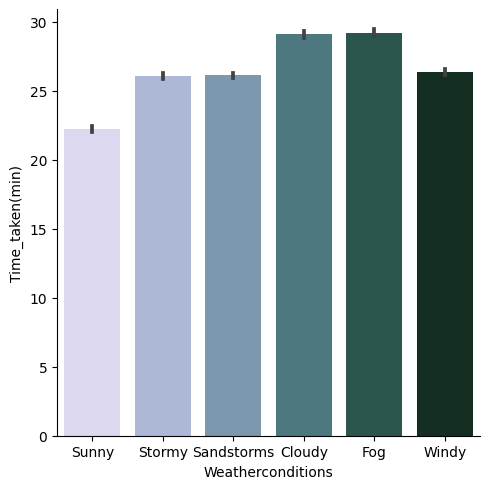

In [69]:
# Catplot: Delivery Time v/s Weather Conditions

sns.catplot(data=edal_df, x="Weatherconditions", y="Time_taken(min)", kind="bar", palette="ch: 5",)

**PDSL**

In [80]:
pdsl_df = master_df.copy()
pdsl_df = pdsl_df.drop(columns = [ 'Delivery_person_ID','Order_Date','Time_Order_picked','Time_Orderd'] )
pdsl_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),distance_km,avg_speed_kmph
0,37.0,4.9,Sunny,High,2.0,Snack,motorcycle,0.0,No,Urban,24.0,3.02,8.0
1,34.0,4.5,Stormy,Jam,2.0,Snack,scooter,1.0,No,Metropolitian,33.0,20.14,37.0
2,23.0,4.4,Sandstorms,Low,0.0,Drinks,motorcycle,1.0,No,Urban,26.0,1.55,4.0
3,38.0,4.7,Sunny,Medium,0.0,Buffet,motorcycle,1.0,No,Metropolitian,21.0,7.77,22.0
4,32.0,4.6,Cloudy,High,1.0,Snack,scooter,1.0,No,Metropolitian,30.0,6.20,12.0


In [81]:
num_cols = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries','Time_taken(min)']
for col in num_cols:
    pdsl_df[col]=pdsl_df[col].astype('float64')

In [ ]:
# 0 -- bad, 1 - good, 2-better, 3-best -- vehicle condition

In [82]:
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Weatherconditions','Road_traffic_density','Type_of_order',
                                          'Type_of_vehicle', 'City'])
pdsl_df = pd.get_dummies(pdsl_df,columns = ['Festival'], drop_first=True)
     

In [83]:
features = pdsl_df.drop('Time_taken(min)', axis =1)
label = pdsl_df['Time_taken(min)'].copy()
     

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [85]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(26181, 27) (11221, 27) (26181,) (11221,)


In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt



model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()

models = {'Linear Regression':model_lr, 'Random Forest Regression': model_rf, 'Gradient Boosting Regressor':model_gbr, 
          'Decision Tree Regressor': model_dtr}

for i in models.keys():
  print(i)
  models[i].fit(x_train, y_train)
  y_pred = models[i].predict(x_test)
  print("Accuracy in training dataset: ", (models[i].score(x_train, y_train)*100))
  print("Accuracy in testing dataset: ", models[i].score(x_test, y_test)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))
  print('--------------------------------------')

Linear Regression
Accuracy in training dataset:  75.80354900679541
Accuracy in testing dataset:  75.50097200868403
RMSE value:  4.598228302529669
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.64128910867656
Accuracy in testing dataset:  97.51146984542483
RMSE value:  1.4655058524117583
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  93.92322717447816
Accuracy in testing dataset:  93.64231385638566
RMSE value:  2.342424736004972
--------------------------------------
Decision Tree Regressor
Accuracy in training dataset:  99.99995633967362
Accuracy in testing dataset:  95.05862663796142
RMSE value:  2.0650945385546318
--------------------------------------


In [87]:
y_pred=model_rf.predict(x_test)
out=pd.DataFrame({'actual':y_test,'predicted':y_pred})
out=pdsl_df.copy().merge(out,left_index=True,right_index=True)
out[['Delivery_person_Ratings','actual','predicted']].sample(10)

,Delivery_person_Ratings,actual,predicted
8264,4.9,13.0,13.05
22011,4.4,42.0,40.60
39288,4.9,37.0,35.73
26780,4.5,21.0,21.01
29153,5.0,30.0,29.53
26965,4.9,25.0,25.00
29950,4.6,10.0,10.00
23876,4.7,28.0,26.75
29383,4.8,27.0,27.00
24325,4.5,30.0,33.69
